In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Long Short Term Memory
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [11]:
print(X_train.shape)

(25000,)


In [12]:
max_kelime = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_kelime)
X_test = sequence.pad_sequences(X_test, maxlen = max_kelime)
print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [13]:
print(X_train.shape)

(25000, 500)


In [14]:
#LSTM Model Mimarisi
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = 'sigmoid'))

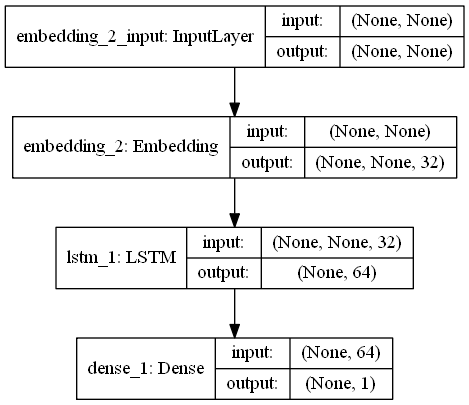

In [15]:
#model grafiği
tf.keras.utils.plot_model(model, "LSTM-IMDB.png", show_shapes = True, show_layer_names = True)

In [17]:
#Modelin Eğitilmesi
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 197s 10ms/step - loss: 0.6664 - accuracy: 0.6216 - val_loss: 0.6546 - val_accuracy: 0.6188
Epoch 2/10
20000/20000 [==============================] - 210s 10ms/step - loss: 0.6345 - accuracy: 0.6824 - val_loss: 0.6092 - val_accuracy: 0.7354
Epoch 3/10
20000/20000 [==============================] - 257s 13ms/step - loss: 0.4841 - accuracy: 0.8074 - val_loss: 0.3868 - val_accuracy: 0.8262
Epoch 4/10
20000/20000 [==============================] - 304s 15ms/step - loss: 0.3152 - accuracy: 0.8733 - val_loss: 0.3330 - val_accuracy: 0.8606
Epoch 5/10
20000/20000 [==============================] - 333s 17ms/step - loss: 0.2604 - accuracy: 0.8981 - val_loss: 0.3255 - val_accuracy: 0.8682
Epoch 6/10
20000/20000 [==============================] - 363s 18ms/step - loss: 0.2204 - accuracy: 0.9161 - val_loss: 0.3110 - val_accuracy: 0.8790
Epoch 7/10
20000/20000 [==============================] 

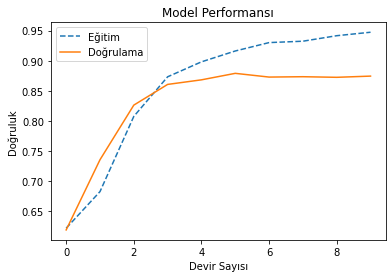

In [19]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

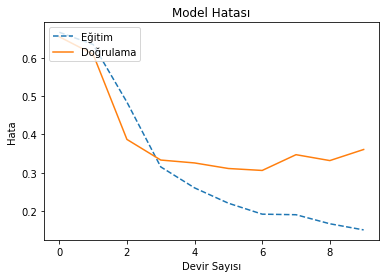

In [20]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper left")
plt.show()

In [ ]:
performans = model.evaluate(X_test, y_test, verbose = 0)

print("Modelin Test Performansı: %.2f%%" % (performans[1]*100))